# Exemplo 1

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
base = pd.read_csv('house_prices.csv')

In [20]:
X = base.iloc[:, 3:19].values
y = base.iloc[:, 2].values

(array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
          4.75112e+01, -1.22257e+02],
        [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
          4.77210e+01, -1.22319e+02],
        [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
          4.77379e+01, -1.22233e+02],
        ...,
        [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
          4.75944e+01, -1.22299e+02],
        [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
          4.75345e+01, -1.22069e+02],
        [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
          4.75941e+01, -1.22299e+02]]),
 array([221900., 538000., 180000., ..., 402101., 400000., 325000.]))

In [43]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state = 0)
X_treinamento, X_teste, y_treinamento, y_teste

(array([[63],
        [23],
        [48],
        [53],
        [33],
        [18],
        [43]], dtype=int64), array([[28],
        [58],
        [38]], dtype=int64), array([10100,   520,  2040,  3080,   830,   470,  1530], dtype=int64), array([ 630, 5100, 1150], dtype=int64))

In [19]:
poly = PolynomialFeatures(degree = 2)
X_treinamento_poly = poly.fit_transform(X_treinamento)
X_teste_poly = poly.transform(X_teste)
poly

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [18]:
regressor = LinearRegression()
regressor.fit(X_treinamento_poly, y_treinamento)
score = regressor.score(X_treinamento_poly, y_treinamento)
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
previsoes = regressor.predict(X_teste_poly)
previsoes

array([ 386036.3700943 , 1991100.4207077 ,  578376.40392303, ...,
        433338.95427704,  234076.04325867,  123441.84377289])

In [21]:
mae = mean_absolute_error(y_teste, previsoes)
mae

101229.0884615494

# Exemplo 2

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [26]:
base = pd.read_csv('plano_saude2.csv')

In [24]:
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1].values

In [29]:
# Regressão linear simples
regressor1 = LinearRegression()
regressor1.fit(X, y)
score1 = regressor1.score(X, y)

In [30]:
regressor1.predict(np.array(40).reshape(1, -1))

array([2463.18787879])

Text(0, 0.5, 'Custo')

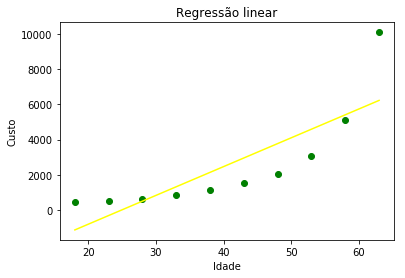

In [33]:
plt.scatter(X, y, color = 'green')
plt.plot(X, regressor1.predict(X), color = 'yellow')
plt.title('Regressão linear')
plt.xlabel('Idade')
plt.ylabel('Custo')

In [36]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)

In [39]:
regressor2 = LinearRegression()
regressor2.fit(X_poly, y)
score2 = regressor2.score(X_poly, y)

In [40]:
regressor2.predict(poly.transform(np.array(40).reshape(1, -1))

SyntaxError: unexpected EOF while parsing (<ipython-input-40-102efac8b64e>, line 1)

Text(0, 0.5, 'Custo')

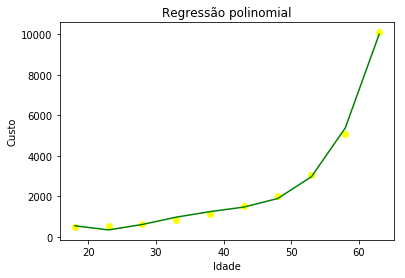

In [42]:
plt.scatter(X, y, color = 'yellow')
plt.plot(X, regressor2.predict(poly.fit_transform(X)), color = 'green')
plt.title('Regressão polinomial')
plt.xlabel('Idade')
plt.ylabel('Custo')